# Happiness Inside a Job and Employee Churnover

Employee turnover refers to the percentage of workers who leave an organization and are replaced by new employees. It is very costly for organizations, where costs include but not limited to: separation, vacancy, recruitment, training and replacement. On average, organizations invest between four weeks and three months training new employees. This investment would be a loss for the company if the new employee decided to leave the first year

# Happy Force and IBM Employee Simualted Data

During these examples we will be dealing with a database provided by [IBM](https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/). It contains employee data to help uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists!


# IBM Data
<h3>Notes on DataFrame</h3>

- Age - Numerical
- Attrition - Employee leaving the company (0=no, 1=yes)
- Business Travel	- (1=No Travel, 2=Travel Frequently, 3=Tavel Rarely)
- Department - (1=HR, 2=R&D, 3=Sales)
- Distance From Home - Numerical Value
- Education -	Numerical Value
- Education Field - 	(1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TECHNICAL)
- EMPLOYEE COUNT	Numerical Value
- EMPLOYEE NUMBER	Numerical Value - EMPLOYEE ID
- ENVIROMENT SATISFACTION	Numerical Value - SATISFACTION WITH THE ENVIROMENT
- GENDER	(1=FEMALE, 2=MALE)
- HOURLY RATE	Numerical Value - HOURLY SALARY
- JOB INVOLVEMENT	Numerical Value - JOB INVOLVEMENT
- JOB LEVEL	Numerical Value - LEVEL OF JOB
- JOB ROLE	(1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= REASEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIEVE, 9= SALES REPRESENTATIVE)
- JOB SATISFACTION	Numerical Value - SATISFACTION WITH THE JOB
- MARITAL STATUS	(1=DIVORCED, 2=MARRIED, 3=SINGLE)
- MONTHLY INCOME	Numerical Value - MONTHLY SALARY
- MONTHY RATE	Numerical Value - MONTHY RATE
- NUMCOMPANIES WORKED	Numerical Value - NO. OF COMPANIES WORKED AT
- OVER 18	(1=YES, 2=NO)
- OVERTIME	(1=NO, 2=YES)
- PERCENT SALARY HIKE	Numerical Value - PERCENTAGE INCREASE IN SALARY.
- The parentage of change in salary between 2 year (2017, 2018).
- PERFORMANCE RATING	Numerical Value - ERFORMANCE RATING
- RELATIONS SATISFACTION	Numerical Value - RELATIONS SATISFACTION
- STANDARD HOURS	Numerical Value - STANDARD HOURS
- STOCK OPTIONS LEVEL	Numerical Value - STOCK OPTIONS.
- TOTAL WORKING YEARS	Numerical Value - TOTAL YEARS WORKED
- TRAINING TIMES LAST YEAR	Numerical Value - HOURS SPENT TRAINING
- WORK LIFE BALANCE	Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE
- YEARS AT COMPANY	Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY
- YEARS IN CURRENT ROLE	Numerical Value -YEARS IN CURRENT ROLE
- YEARS SINCE LAST PROMOTION	Numerical Value - LAST PROMOTION
- YEARS WITH CURRENT MANAGER	Numerical Value - YEARS SPENT WITH CURRENT MANAGER

In [1]:
#Matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

# make prettier plots
%config InlineBackend.figure_format = 'svg' 

#Numpy
import numpy as np

#Pandas
import pandas as pd
import pandas_profiling

#Pickle
import pickle

C:\Users\moham\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\moham\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\moham\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\moham\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\moham\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\moham\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Users\moh

In [2]:
ibm_data = pd.read_csv('./data/ibm.csv')

In [3]:
#Function to preprocess data
def preprocess_label_encoding(df):
    
    #Standardize column names
    df.columns = df.columns.str.strip()
    
    #drop duplicate data
    df = df.drop_duplicates()
    
    #Modify attrition value to 0 or 1 instead of Yes or No
    attrition_map = {"No": 0, "Yes": 1}
    df["Attrition"] = df["Attrition"].map(attrition_map)
    
    #Modify travel value to 0,1,2 instead of no travel, rarley travel, frequentyl travel
    travel_map = {"Non-Travel": 0, "Travel_Rarely": 1, "Travel_Frequently":2}
    df["BusinessTravel"] = df["BusinessTravel"].map(travel_map)
    
    #Drop DailyRate, Hourly Rate, Monthly Rate  (Have Monthly Income)
    df.drop(['DailyRate', 'MonthlyRate', 'HourlyRate','EmployeeCount','EmployeeNumber','Over18',\
            'StandardHours', 'Education',], axis=1, inplace=True)

    #One hot encode departments and drop first column to avoid linear dependency where some learning algorithms may struggle
    df = pd.get_dummies(df, columns=["Department"], drop_first=True)
    
    #Modify Education Field to 1,2,3,4,5,6 instead of HR,LIFE SCIENCES, MARKETING, MEDICAL SCIENCES, OTHERS, TECHNICAL
    education_map = {"Human Resources": 1, "Life Sciences": 2, "Marketing": 3, \
                     "Medical": 4, "Other": 5, "Technical Degree":6}    
    df["EducationField"] = df["EducationField"].map(education_map)
    df["EducationField"] = df["EducationField"].astype(int)

    #Modify Gender Field to 1,2 instead of Male, Female
    gender_map = {"Male": 1, "Female": 2}
    df["Gender"] = df["Gender"].map(gender_map)
    
    #Modify Job Involvement
    job_involvement_map = {"Sales Executive": 1, "Research Scientist": 2, "Laboratory Technician": 3, \
                           "Manufacturing Director": 4, "Healthcare Representative": 5, "Manager": 6, \
                           "Sales Representative": 7, "Research Director": 8, "Human Resources": 9}
    df["JobRole"] = df["JobRole"].map(job_involvement_map)
    
    #Modify Marital Status
    martial_map = {"Divorced": 1, "Single": 2, "Married": 3}
    df["MaritalStatus"] = df["MaritalStatus"].map(martial_map)   
    
    #Modify Overtime value to 0 or 1 instead of No or Yes
    overtime_map = {"No": 0, "Yes": 1}
    df["OverTime"] = df["OverTime"].map(overtime_map)
    
    #Reset Dataframe Index
    df = df.reset_index(drop=True)
    
    #TODO 
    #Figure Out a Way to Make Sense of: 
    #Education Column
    #Per profiler, Monthly Income is Highly Correlate with Job Level, how should this be handeled
    
    return df

In [4]:
#Function to preprocess data
def preprocess(df):
    
    #Standardize column names
    df.columns = df.columns.str.strip()
    
    #drop duplicate data
    df = df.drop_duplicates()
    
    #Modify attrition value to 0 or 1 instead of Yes or No
    attrition_map = {"No": 0, "Yes": 1}
    df["Attrition"] = df["Attrition"].map(attrition_map)
    
    #Modify travel value to 0,1,2 instead of no travel, rarley travel, frequentyl travel
    travel_map = {"Non-Travel": 0, "Travel_Rarely": 1, "Travel_Frequently":2}
    df["BusinessTravel"] = df["BusinessTravel"].map(travel_map)
    
    #Drop DailyRate, Hourly Rate, Monthly Rate  (Have Monthly Income)
    df.drop(['DailyRate', 'MonthlyRate', 'HourlyRate','EmployeeCount','EmployeeNumber','Over18',\
            'StandardHours', 'Education',], axis=1, inplace=True)

    #One hot encode Departments and drop first column to avoid linear dependency 
    df = pd.get_dummies(df, columns=["Department"], drop_first=True)
    
    #One hot encode Education Field and drop first column to avoid linear dependency 
    df = pd.get_dummies(df, columns=["EducationField"], drop_first=True)
    
    ##One hot encode Gender Field and drop first column to avoid linear dependency
    df = pd.get_dummies(df, columns=["Gender"], drop_first=True)
    
    #One hot encode Job Involvement and drop first column to avoid linear dependency
    df = pd.get_dummies(df, columns=["JobRole"], drop_first=True)
    
    #One hot encode Marital Status and drop first column to avoid linear dependency
    df = pd.get_dummies(df, columns=["MaritalStatus"], drop_first=True)
    
    #Modify Overtime value to 0 or 1 instead of No or Yes
    overtime_map = {"No": 0, "Yes": 1}
    df["OverTime"] = df["OverTime"].map(overtime_map)
    
    #Reset Dataframe Index
    df = df.reset_index(drop=True)
    
    #TODO 
    #Figure Out a Way to Make Sense of: 
    #Education Column
    #Per profiler, Monthly Income is Highly Correlate with Job Level, how should this be handeled
    
    return df

In [5]:
ibm_df_label_encoded = preprocess_label_encoding(ibm_data)

In [6]:
ibm_df = preprocess(ibm_data)

In [7]:
pandas_profiling.ProfileReport(ibm_df)

Number of variables,40
Number of observations,1470
Total Missing (%),0.0%
Total size in memory,278.6 KiB
Average record size in memory,194.1 B
Numeric,18
Categorical,0
Boolean,21
Date,0
Text (Unique),0
Rejected,1


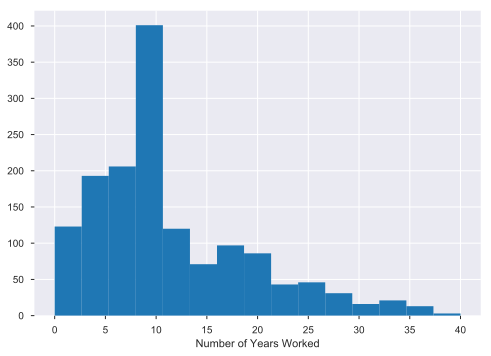

In [8]:
ax = ibm_df['TotalWorkingYears'].hist(bins=15);
ax.set_xlabel("Number of Years Worked");

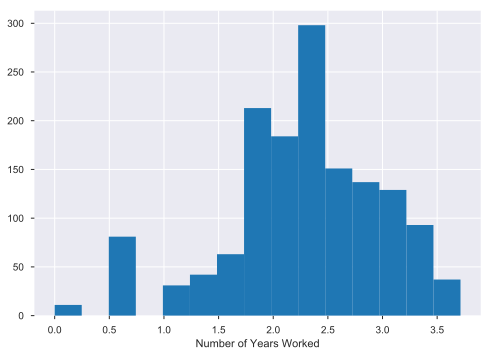

In [9]:
#Normalize Number of Years Worked
data_years_worked = np.log(ibm_df['TotalWorkingYears']+1)
ax = data_years_worked.hist(bins=15);
ax.set_xlabel("Number of Years Worked");

In [10]:
#Normalize Number of Years Worked
ibm_df['TotalWorkingYears']= np.log(ibm_df['TotalWorkingYears']+1)

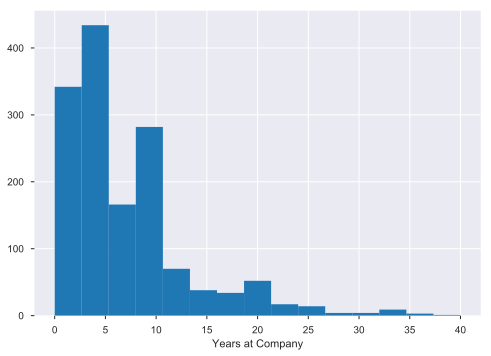

In [11]:
ax = ibm_df['YearsAtCompany'].hist(bins=15);
ax.set_xlabel("Years at Company");

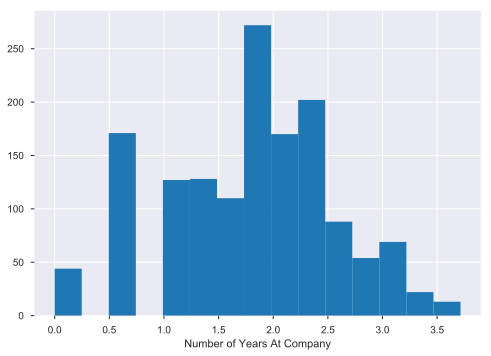

In [12]:
#Normalize Number of Years at Company
data_years_worked = np.log(ibm_df['YearsAtCompany']+1)
ax = data_years_worked.hist(bins=15);
ax.set_xlabel("Number of Years At Company");

In [13]:
#Normalize Number of Years Worked
ibm_df['YearsAtCompany']= np.log(ibm_df['YearsAtCompany']+1)

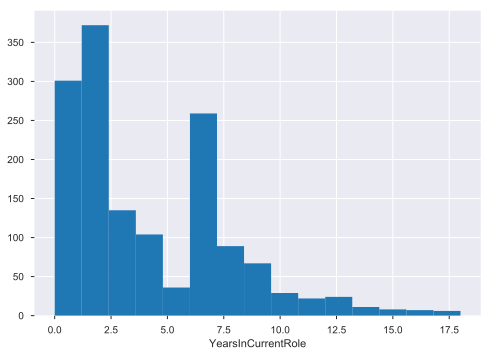

In [14]:
ax = ibm_df['YearsInCurrentRole'].hist(bins=15);
ax.set_xlabel("YearsInCurrentRole");

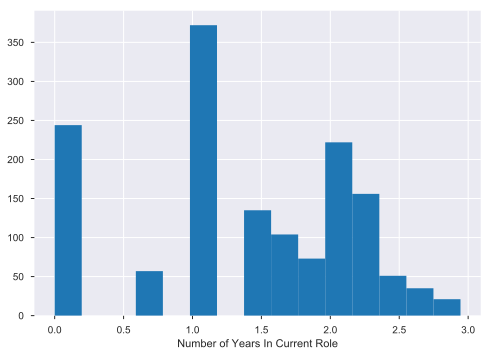

In [15]:
#Normalize Number of Years In Current Role
data_years_worked = np.log(ibm_df['YearsInCurrentRole']+1)
ax = data_years_worked.hist(bins=15);
ax.set_xlabel("Number of Years In Current Role");

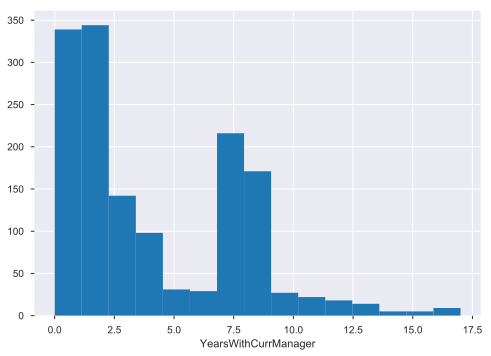

In [16]:
ax = ibm_df['YearsWithCurrManager'].hist(bins=15);
ax.set_xlabel("YearsWithCurrManager");


In [17]:
with open('./data/ibm_df_label_encoded.pickle', 'wb') as f:
    pickle.dump(ibm_df_label_encoded,f)

In [18]:
with open('./data/ibm_df.pickle', 'wb') as f:
    pickle.dump(ibm_df,f)